# 시계열분석 (Time Series)

* 시간 ! : 특정 간격 갖는 시간 (Lag)
    - Lag 에서 Data의 Trend를 찾는다! 
    

* 일변량 정상시계열 
    - ARIMA 


* Trend : 추세 
* Seasonality : 계절성 
* Cycle : 주기 
* Noise : 잡음 -> White Noise 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.rc('font',family= 'Malgun Gothic')

In [3]:
df1 = pd.read_csv('Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [7]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [8]:
df1['Datetime'].describe()

<ipython-input-8-1eedf18d289e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe()


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [9]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

<ipython-input-9-093d56191f01>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['Week'] = df1['Datetime'].dt.week


In [10]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


KeyboardInterrupt: 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


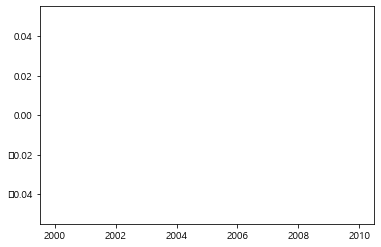

In [12]:
sns.lineplot(data=df1, x='Datetime' ,y='구매금액', estimator=sum )

In [13]:
p1 = pd.pivot_table(data=df1, 
                    index='Datetime',
                    values='구매금액',aggfunc='sum').reset_index()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

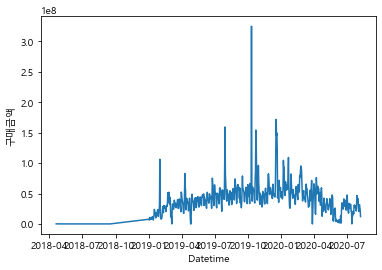

In [15]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [17]:
p2 = pd.pivot_table(data=df1, 
                    index=['Datetime','물품대분류'],
                    values='구매금액',aggfunc='sum').reset_index()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

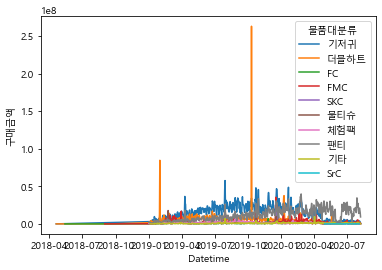

In [18]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

In [22]:
cond1 = (df1['물품대분류']=='기저귀')
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


**ARIMA (Auto Regressive Integrated  Moving Average Model)**

* AR (Auto Regressive Model) : 자기회귀모델 
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델 
    - ACF  : 자기상관함수 / 특정 구간내 데이터간 상관관계 
    - PACF : 부분자기상관함수
    
    
    
* MA (Moving Average Model) : 이동평균모델 
    - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델 

* Difference 차분 


**ARIMA Model**

- 단기예측에 적합 
- 계절적 변동요인 (주기적 변동)
- Sample > 50 
- 정성적자료 
    -> 차분 

In [23]:
import statsmodels.tsa.api as tsa

In [25]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [30]:
df_time2 = pd.pivot_table(data=df2, index='Datetime'
                         ,values='구매금액',aggfunc='sum').reset_index()
df_time2.set_index('Datetime')

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


In [33]:
df_time = pd.pivot_table(data=df2, index='Datetime'
                         ,values='구매금액',aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [41]:
y = df_time['구매금액'].resample('1D').mean()

In [42]:
y.isnull().sum()

7

In [45]:
y1 = y.fillna( method='ffill' )

In [47]:
y1

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

* 시계열 분해 
    - Trend (추세요인)
    - Seasonality  (계절요인)
    - Resdiual (불규칙 또는 순환 요인)

In [48]:
from pylab import rcParams 

rcParams['figure.figsize']= 15,10


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


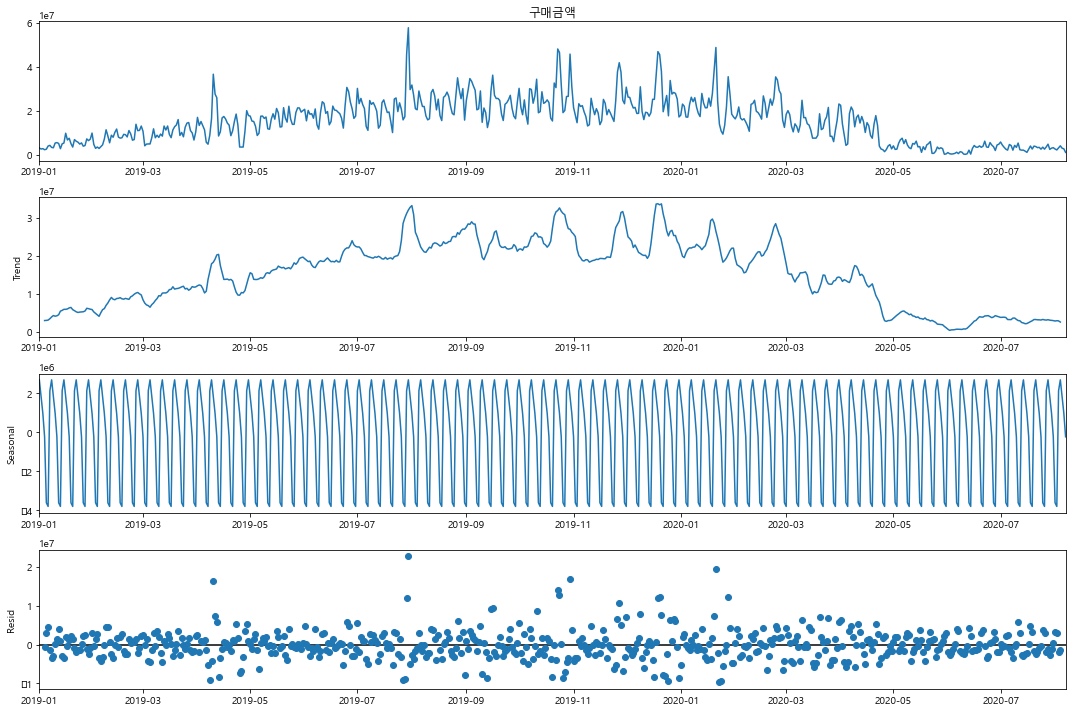

In [49]:
# 시계열 모델 생성 
model_series = tsa.seasonal_decompose(y1, model='additive')
# 모델 시각화 
fig = model_series.plot()
plt.show()

In [50]:
import itertools

In [51]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [55]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [52]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [54]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [56]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [61]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",18983.237154
47,"(1, 0, 1)","(1, 1, 1, 12)",18983.666911


In [60]:
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.037     15.766      0.000       0.516       0.663
ma.L1          0.2724      0.045      6.097      0.000       0.185       0.360
ar.S.L12       0.9777      0.011     86.927      0.000       0.956       1.000
ma.S.L12      -0.7738      0.038    -20.540      0.000      -0.848      -0.700
sigma2      2.882e+13   3.25e-16   8.86e+28      0.000    2.88e+13    2.88e+13


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


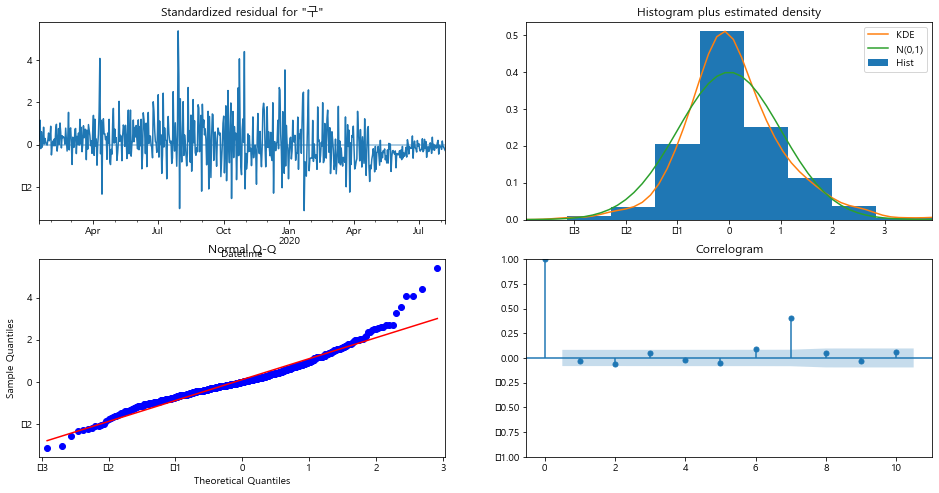

In [62]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [63]:
results.get_prediction()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


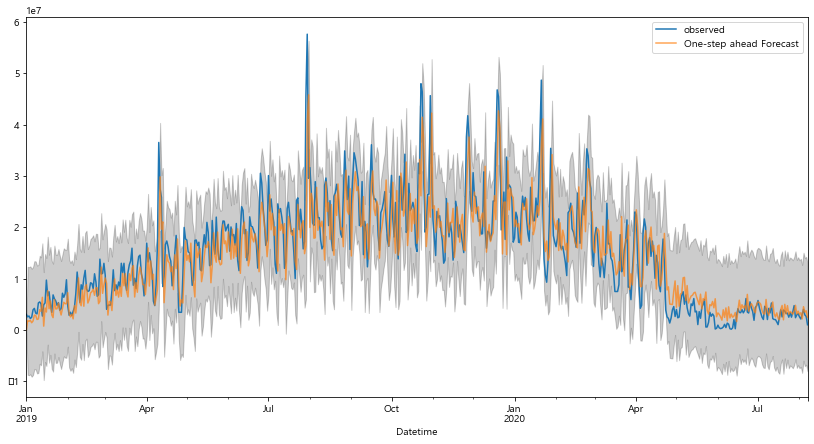

In [65]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [66]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 28388115591104.41


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


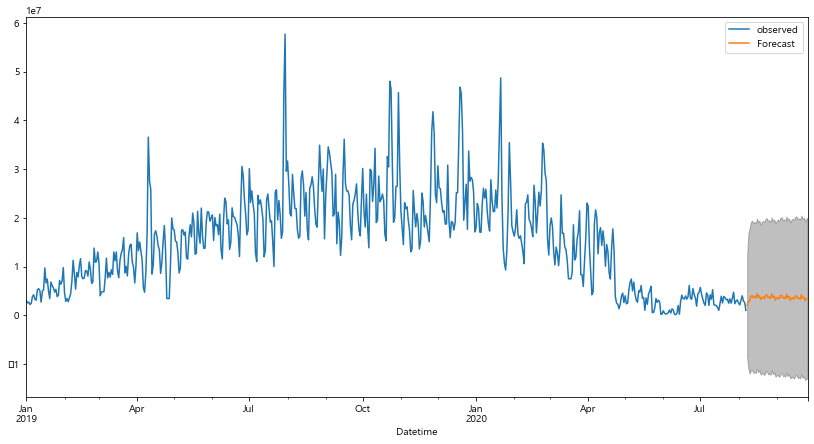

In [67]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()